**TEAM 1**

In [1]:
!pip install -U pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=31c9580b6ff42ac6c7c9f9822349c117a8cd402030d3e252ffab0a9191309443
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [2]:
# Standard Library Imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import io
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dado o exercício da team 1 decidimos filtrar os dados às lojas 261 e 945 e ao mês de dezembro.

In [52]:
# transforming the csv into a pandas data frame
dados = pd.read_excel('/content/drive/MyDrive/Notebooks/Exercicio Final.xlsx')

dados.head()

,Loja,Cidade,DATA,SUM(ITENS),SUM(VALOR)
0,261,Porto,2022-01-04,3438,6825.08
1,261,Porto,2022-01-19,3645,6614.07
2,261,Porto,2022-01-23,4432,8300.36
3,261,Porto,2022-01-28,3773,7316.09
4,261,Porto,2022-02-14,3861,7015.80


In [53]:
dados = dados.loc[(dados['Loja'] == 261) | (dados['Loja'] == 945)]

# Exibindo as primeiras linhas dos dados filtrados
print(dados.head())
print(dados.info())

   Loja Cidade       DATA  SUM(ITENS)  SUM(VALOR)
0   261  Porto 2022-01-04        3438     6825.08
1   261  Porto 2022-01-19        3645     6614.07
2   261  Porto 2022-01-23        4432     8300.36
3   261  Porto 2022-01-28        3773     7316.09
4   261  Porto 2022-02-14        3861     7015.80
<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 25442
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Loja        667 non-null    int64         
 1   Cidade      667 non-null    object        
 2   DATA        667 non-null    datetime64[ns]
 3   SUM(ITENS)  667 non-null    int64         
 4   SUM(VALOR)  667 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 31.3+ KB
None


In [54]:
# Filtrar o DataFrame para incluir apenas as vendas de dezembro
dados = dados[(dados['DATA'].dt.month == 12)]

# Calcular as vendas médias por dia para as lojas 261 e 945
vendas_media_261 = dados[dados['Loja'] == 261]['SUM(ITENS)'].mean()
print(f'O nº médio de vendas da loja 261 é: {vendas_media_261:.2f}')
vendas_media_945 = dados[dados['Loja'] == 945]['SUM(ITENS)'].mean()
print(f'O nº médio de vendas da loja 261 é: {vendas_media_945:.2f}')

O nº médio de vendas da loja 261 é: 3289.83
O nº médio de vendas da loja 261 é: 2068.37


In [55]:
# Our package
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file
# Generate the Profiling Report
profile = ProfileReport(dados, title="Fire Dataset", html={"style": {"full_width": True}}, sort=None)

In [56]:
# Just to get a sense of the data
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

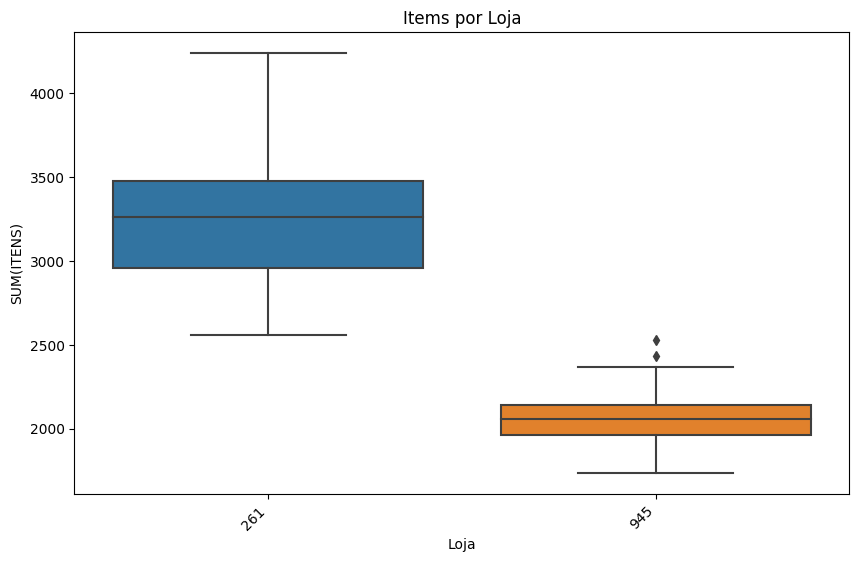

In [62]:
#Outliers
# Create a box plot for the year with rotated X-axis labels
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='Loja', y='SUM(ITENS)')
plt.title('Items por Loja')
# Rotate the X-axis labels for better readability
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

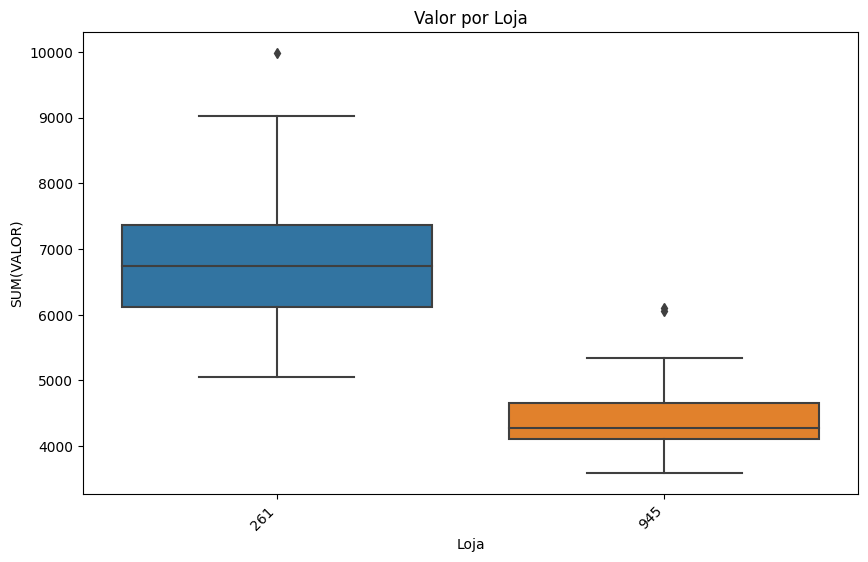

In [61]:
#Outliers
# Create a box plot for the year with rotated X-axis labels
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='Loja', y='SUM(VALOR)')
plt.title('Valor por Loja')
# Rotate the X-axis labels for better readability
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [74]:
# Supondo que 'dados' seja o seu DataFrame
dados['VALOR/ITENS'] = dados['SUM(VALOR)'] / dados['SUM(ITENS)']

# Exibindo as primeiras linhas do DataFrame atualizado
print(dados.head())

      Loja  Cidade       DATA  SUM(ITENS)  SUM(VALOR)  ITENS/VALOR  \
35     261   Porto 2022-12-24        3484     8465.01     0.411577   
36     261   Porto 2022-12-26        3254     6014.95     0.540985   
37     261   Porto 2022-12-27        3003     6122.40     0.490494   
38     261   Porto 2022-12-31        2557     6167.96     0.414562   
2443   945  Aveiro 2022-12-07        1832     3589.81     0.510333   

      VALOR/ITENS  
35       2.429681  
36       1.848479  
37       2.038761  
38       2.412186  
2443     1.959503  


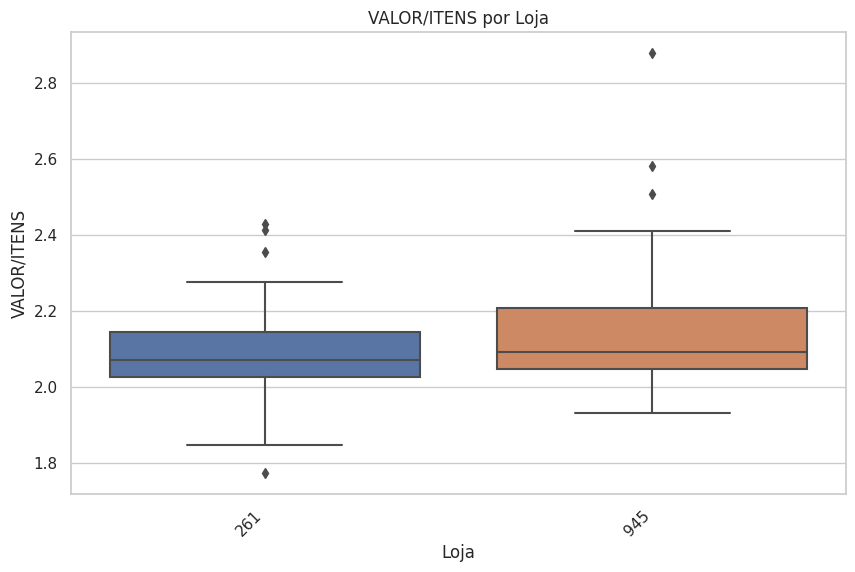

In [76]:
#Outliers
# Create a box plot for the year with rotated X-axis labels
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='Loja', y='VALOR/ITENS')
plt.title('VALOR/ITENS por Loja')
# Rotate the X-axis labels for better readability
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [69]:
# Agrupando os dados por loja
grupo_loja = dados.groupby('Loja')

# Função para identificar outliers em cada grupo
def identificar_outliers(grupo):
    q1 = grupo['SUM(VALOR)'].quantile(0.25)
    q3 = grupo['SUM(VALOR)'].quantile(0.75)
    iqr = q3 - q1

    # Definindo os limites para identificar outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Identificando os outliers
    outliers = grupo[(grupo['SUM(VALOR)'] < limite_inferior) | (grupo['SUM(VALOR)'] > limite_superior)]

    return outliers

# Aplicando a função para cada grupo de loja
outliers_por_loja = grupo_loja.apply(identificar_outliers)

# Exibindo os outliers por loja
print("Outliers:")
print(outliers_por_loja)


Outliers:
           Loja  Cidade       DATA  SUM(ITENS)  SUM(VALOR)  ITENS/VALOR
Loja                                                                   
261  6570   261   Porto 2022-12-23        4237     9983.33     0.424407
945  5773   945  Aveiro 2022-12-13        2104     6057.83     0.347319
     5776   945  Aveiro 2022-12-23        2530     6100.50     0.414720


A equipa decidiu não eliminar os outliers uma vez que são justificáveis, ou seja, o pico do dia 13 provavelmente está relacionado com o subsídio de natal e o pico do dia 23 representa as compras feitas na véspera de natal.

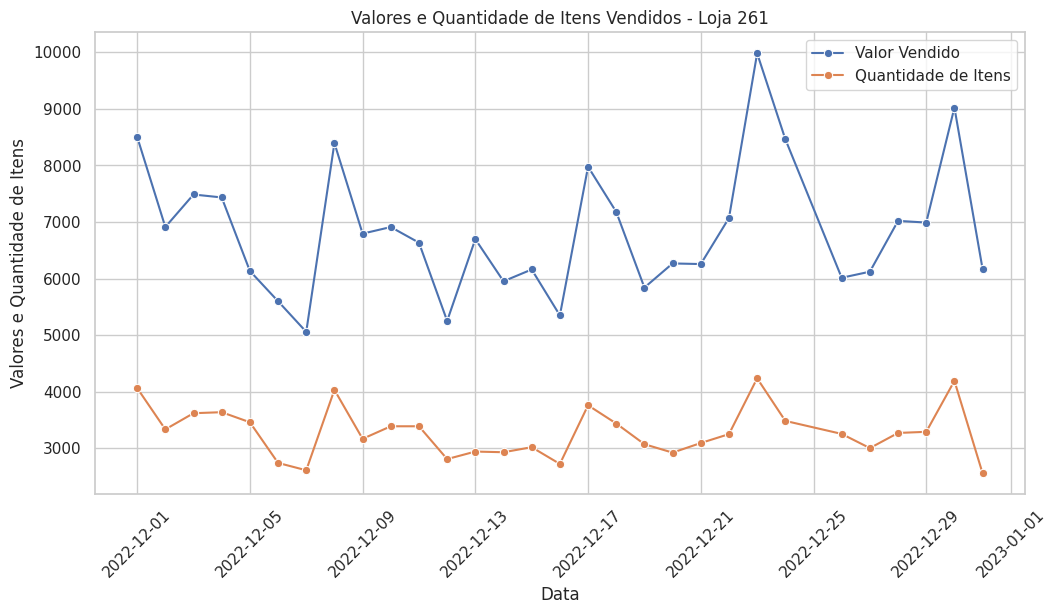

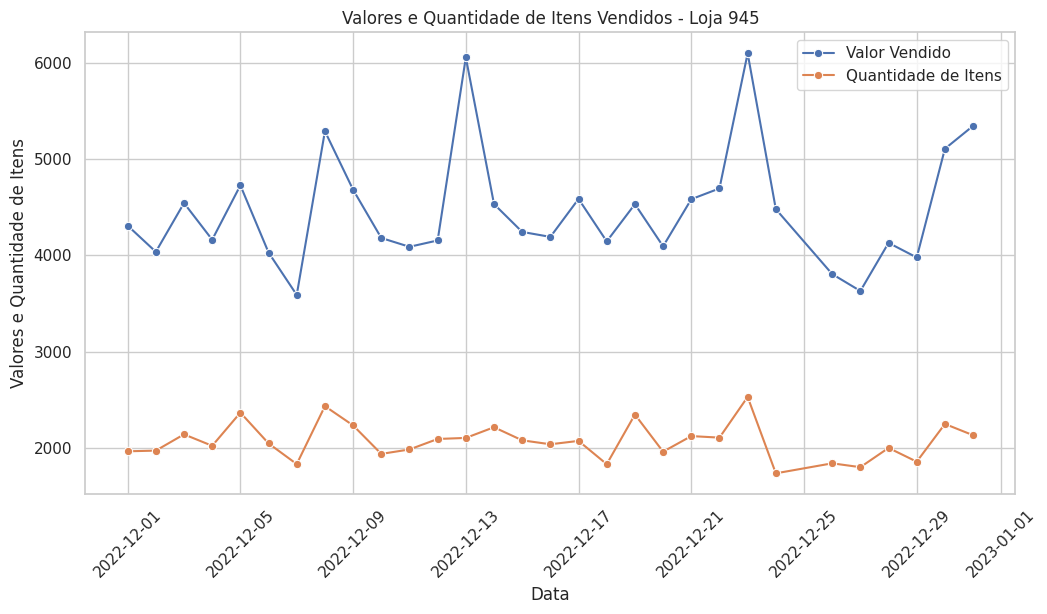

In [71]:
# Configurações de estilo para os plots
sns.set(style="whitegrid")
# Criar um gráfico para cada loja
for loja in dados['Loja'].unique():
    # Filtrar o DataFrame para a loja específica
    dados_loja = dados[dados['Loja'] == loja]
    # Criar gráfico de linha para o valor por dia
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dados_loja, x='DATA', y='SUM(VALOR)', estimator=sum, marker='o', label='Valor Vendido')
    # Adicionar uma segunda linha para o número de itens por dia
    sns.lineplot(data=dados_loja, x='DATA', y='SUM(ITENS)', estimator=sum, marker='o', label='Quantidade de Itens')
    # Adicionar detalhes ao gráfico
    plt.title(f'Valores e Quantidade de Itens Vendidos - Loja {loja}')
    plt.xlabel('Data')
    plt.ylabel('Valores e Quantidade de Itens')
    plt.xticks(rotation=45)
    # Adicionar legenda
    plt.legend()
    # Exibir o gráfico
    plt.show()

In [81]:
from scipy.stats import ttest_ind
# Tenta converter para o formato brasileiro
# Convertendo a coluna DATA para o formato datetime
dados['DATA'] = pd.to_datetime(dados['DATA'])
dados_dezembro = dados[(dados['DATA'].dt.month == 12)]
dados_loja261 = dados_dezembro[dados_dezembro['Loja'] == 261]
dados_loja945 = dados_dezembro[dados_dezembro['Loja'] == 945]
# Convertendo a coluna DATA para o formato datetime
dados['DATA'] = pd.to_datetime(dados['DATA'])
dados_dezembro = dados[(dados['DATA'].dt.month == 12)]
dados_loja261 = dados_dezembro[dados_dezembro['Loja'] == 261]
dados_loja945 = dados_dezembro[dados_dezembro['Loja'] == 945]
# Calculando as médias
media_loja261 = dados_loja261['SUM(VALOR)'].mean()
media_loja945 = dados_loja945['SUM(VALOR)'].mean()
# Imprimindo as médias
print(f"Média de vendas por dia em dezembro para Loja 261: {media_loja261:.2f}")
print(f"Média de vendas por dia em dezembro para Loja 945: {media_loja945:.2f}")
# Realizando o teste z (usando ttest_ind com equal_var=True)
resultado_teste_z, valor_p_z = ttest_ind(dados_loja261['SUM(VALOR)'], dados_loja945['SUM(VALOR)'], equal_var=True)
# Imprimindo a hipótese nula
print("Hipótese Nula (H0): As médias de vendas por dia em dezembro para as Lojas 261 e 945 são iguais.")
# Imprimindo os resultados do teste z e valor p
print(f"Resultado do teste z: {resultado_teste_z:.2f}")
print(f"Valor p (z): {valor_p_z:.2f}")
# Conclusão com base nos resultados
alpha = 0.05  # Nível de significância
if valor_p_z < alpha:
    print(f"Conclusão: Rejeitamos a hipótese nula. Há diferença significativa nas médias de vendas por dia, para um nível de significância de {alpha}.")
else:
    print(f"Conclusão: Não temos evidências para rejeitar a hipótese nula. Não há diferença significativa nas médias de vendas por dia.")

Média de vendas por dia em dezembro para Loja 261: 6855.85
Média de vendas por dia em dezembro para Loja 945: 4468.83
Hipótese Nula (H0): As médias de vendas por dia em dezembro para as Lojas 261 e 945 são iguais.
Resultado do teste z: 9.95
Valor p (z): 0.00
Conclusão: Rejeitamos a hipótese nula. Há diferença significativa nas médias de vendas por dia, para um nível de significância de 0.05.
